# Date a Scientist

## Overview

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

You will also create a presentation about your findings from this OKCupid dataset.

The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you.

We’re excited to see the different topics you explore.

## Goal of the Project

Goal of this project is to analyze and train ML models on the OKCupid dataset. The label that we are trying to predict is the `sign` (astrological sign) of the user.

## Explore and Explain Data

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [106]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

### Explore Numerical Data

#### Age

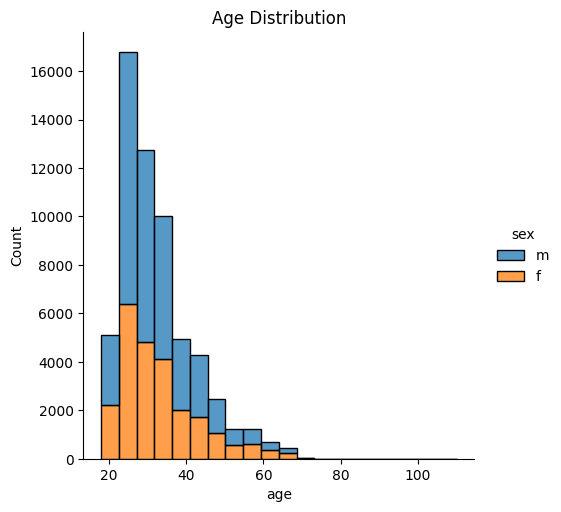

In [107]:
sns.displot(data=df, x='age', bins=20, hue="sex", multiple="stack")
plt.title('Age Distribution')
plt.show()

#### Height

<Figure size 2000x500 with 0 Axes>

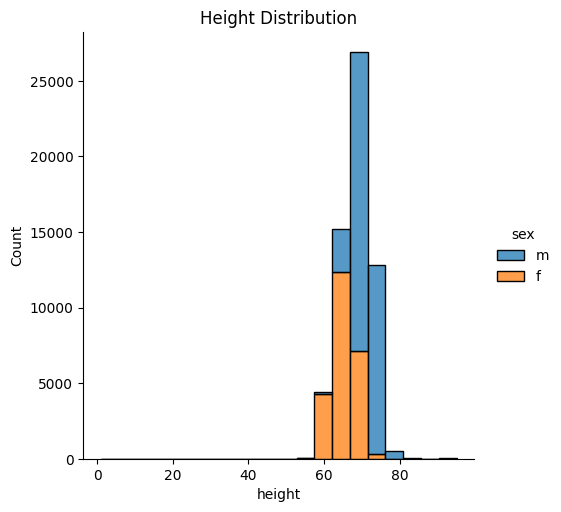

In [108]:
plt.figure(figsize=(20,5))
sns.displot(data=df, x='height', bins=20, hue="sex", multiple="stack")
plt.title('Height Distribution')
plt.show()

#### Income

<Figure size 2000x500 with 0 Axes>

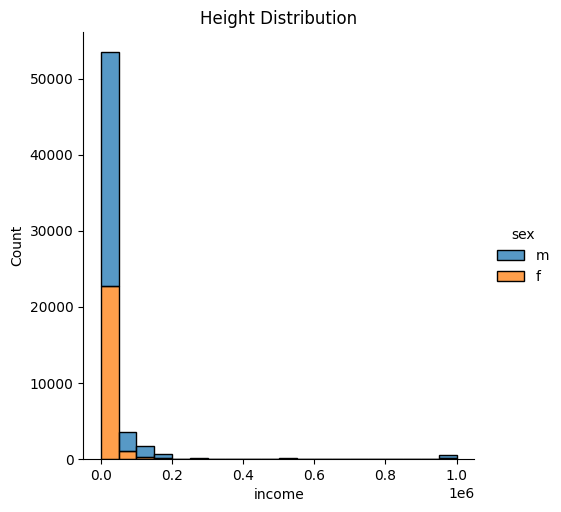

In [109]:
plt.figure(figsize=(20,5))
sns.displot(data=df, x='income', bins=20, hue="sex", multiple="stack")
plt.title('Height Distribution')
plt.show()

### Explore Categorical Data

#### Sex

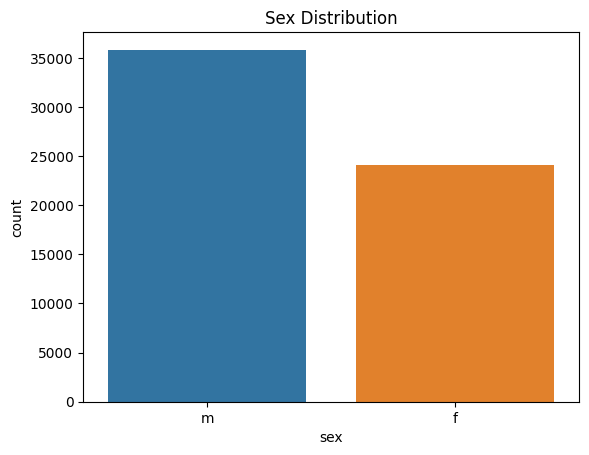

In [110]:
sns.countplot(data=df, x='sex', orient='y', hue='sex')
plt.title('Sex Distribution')
plt.show()

#### Body Type

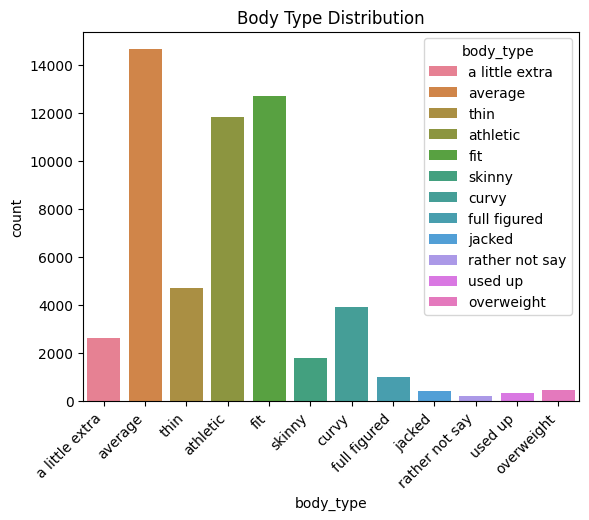

In [111]:
sns.countplot(data=df, x='body_type', hue="body_type")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Body Type Distribution')
plt.show()

#### Sexual Orientation

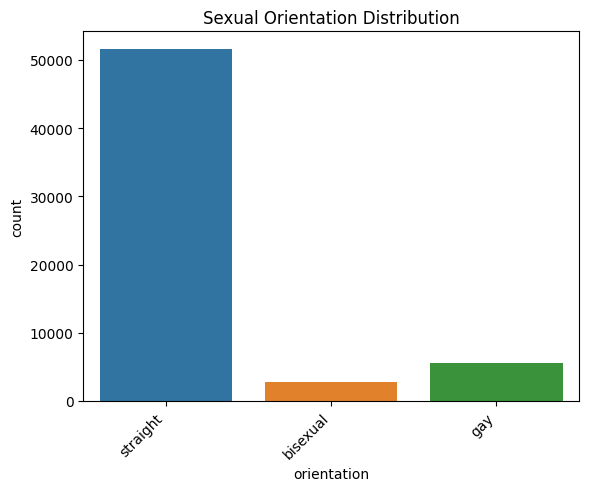

In [112]:
sns.countplot(data=df, x='orientation', hue="orientation")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Sexual Orientation Distribution')
plt.show()

#### Smokes

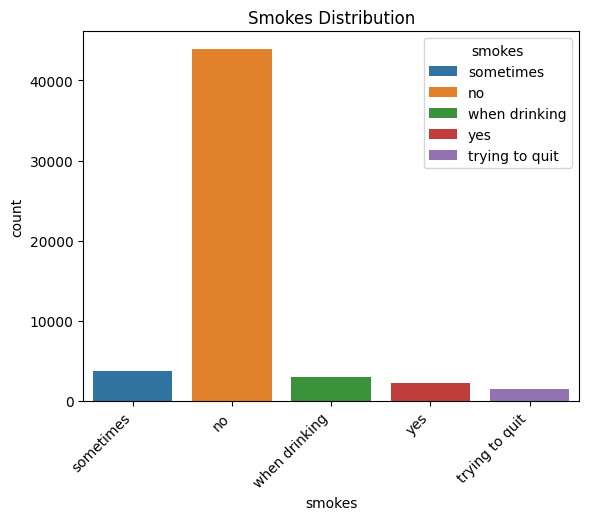

In [113]:
sns.countplot(data=df, x='smokes', hue="smokes")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Smokes Distribution')
plt.show()

#### Drinks

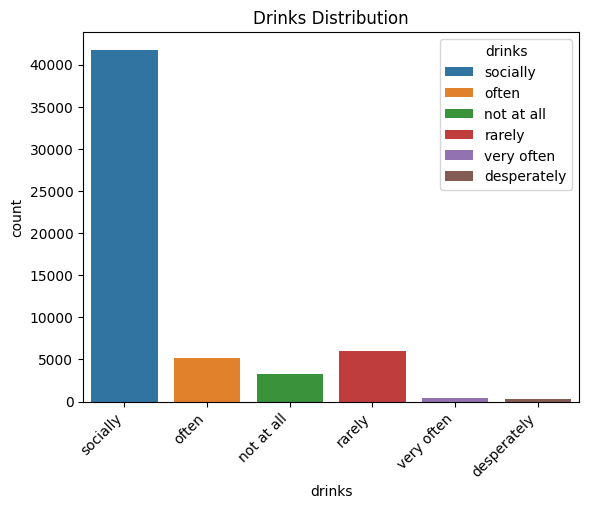

In [114]:
sns.countplot(data=df, x='drinks', hue="drinks")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Drinks Distribution')
plt.show()

#### Status

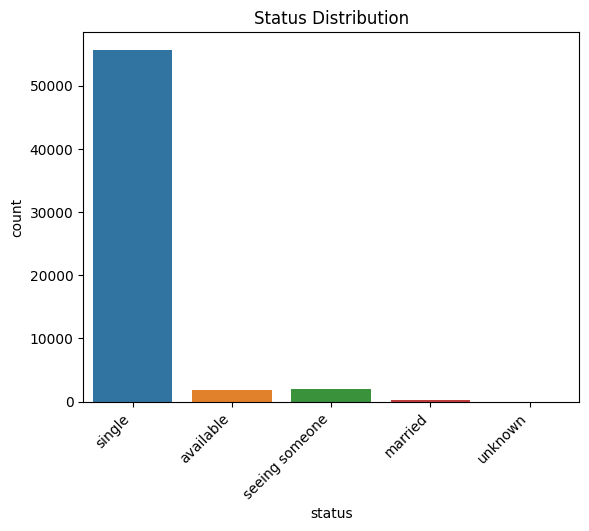

In [115]:
sns.countplot(data=df, x='status', hue="status")
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Status Distribution')
plt.show()

## Preprocess Data

#### Clean Data

In [116]:
df["religionCleaned"] = df.religion.str.split().str.get(0)
df["signCleaned"] = df.sign.str.split().str.get(0)

In [117]:
feature_columns = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned','sex', 'job',]
label_column = 'signCleaned'

subset = df[feature_columns + [label_column]]
subset.head()

,body_type,diet,orientation,pets,religionCleaned,sex,job,signCleaned
0,a little extra,strictly anything,straight,likes dogs and likes cats,agnosticism,m,transportation,gemini
1,average,mostly other,straight,likes dogs and likes cats,agnosticism,m,hospitality / travel,cancer
2,thin,anything,straight,has cats,NaN,m,NaN,pisces
3,thin,vegetarian,straight,likes cats,NaN,m,student,pisces
4,athletic,NaN,straight,likes dogs and likes cats,NaN,m,artistic / musical / writer,aquarius


#### Handle Missing Values

In [118]:
n_rows_has_nan = subset.isnull().any(axis=1).sum()
print(f'Number of rows with NaN values: {n_rows_has_nan}')

Number of rows with NaN values: 43493


In [119]:
subset = subset.dropna()
print(f'Shape after dropping NaN values: {subset.shape}')

Shape after dropping NaN values: (16453, 8)


#### Encode Categorical Data

In [120]:
for column in subset.columns[:-1]:
    print(f'{column}: {subset[column].nunique()}')

body_type: 12
diet: 18
orientation: 3
pets: 15
religionCleaned: 9
sex: 2
job: 21


##### One-Hot Encoding

In [121]:
subset_one_hot = pd.get_dummies(subset, columns=feature_columns).drop(columns=[label_column])
subset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16453 entries, 0 to 59944
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   body_type_a little extra               16453 non-null  bool 
 1   body_type_athletic                     16453 non-null  bool 
 2   body_type_average                      16453 non-null  bool 
 3   body_type_curvy                        16453 non-null  bool 
 4   body_type_fit                          16453 non-null  bool 
 5   body_type_full figured                 16453 non-null  bool 
 6   body_type_jacked                       16453 non-null  bool 
 7   body_type_overweight                   16453 non-null  bool 
 8   body_type_rather not say               16453 non-null  bool 
 9   body_type_skinny                       16453 non-null  bool 
 10  body_type_thin                         16453 non-null  bool 
 11  body_type_used up                

## Train ML Models

In [165]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [123]:
X_train, X_test, y_train, y_test = train_test_split(subset_one_hot, subset[label_column], test_size=0.33, random_state=42)

### Logistic Regression

In [149]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.08987108655616943

In [152]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

    aquarius       0.12      0.03      0.05       852
       aries       0.11      0.08      0.09       865
      cancer       0.13      0.22      0.16       977
   capricorn       0.13      0.06      0.08       813
      gemini       0.12      0.17      0.14       979
         leo       0.13      0.18      0.15      1007
       libra       0.14      0.11      0.12       925
      pisces       0.11      0.16      0.13       901
 sagittarius       0.14      0.10      0.11       895
     scorpio       0.12      0.05      0.07       886
      taurus       0.13      0.10      0.11       948
       virgo       0.12      0.20      0.15       975

    accuracy                           0.13     11023
   macro avg       0.12      0.12      0.12     11023
weighted avg       0.12      0.13      0.12     11023



### K-Nearest Neighbors

In [158]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.08047882136279927

In [159]:
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

    aquarius       0.25      0.67      0.36       852
       aries       0.27      0.50      0.35       865
      cancer       0.30      0.42      0.35       977
   capricorn       0.30      0.32      0.31       813
      gemini       0.36      0.33      0.34       979
         leo       0.40      0.27      0.32      1007
       libra       0.40      0.26      0.32       925
      pisces       0.42      0.26      0.32       901
 sagittarius       0.38      0.23      0.29       895
     scorpio       0.41      0.24      0.31       886
      taurus       0.41      0.24      0.30       948
       virgo       0.41      0.23      0.29       975

    accuracy                           0.33     11023
   macro avg       0.36      0.33      0.32     11023
weighted avg       0.36      0.33      0.32     11023



### Decision Tree

In [153]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.08453038674033149

In [154]:
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78       852
       aries       0.69      0.90      0.78       865
      cancer       0.71      0.88      0.78       977
   capricorn       0.74      0.83      0.78       813
      gemini       0.78      0.81      0.80       979
         leo       0.80      0.79      0.80      1007
       libra       0.81      0.78      0.79       925
      pisces       0.84      0.74      0.79       901
 sagittarius       0.86      0.70      0.78       895
     scorpio       0.90      0.69      0.78       886
      taurus       0.92      0.69      0.79       948
       virgo       0.92      0.67      0.78       975

    accuracy                           0.79     11023
   macro avg       0.80      0.79      0.79     11023
weighted avg       0.80      0.79      0.79     11023



In [160]:
dt.get_depth()

56

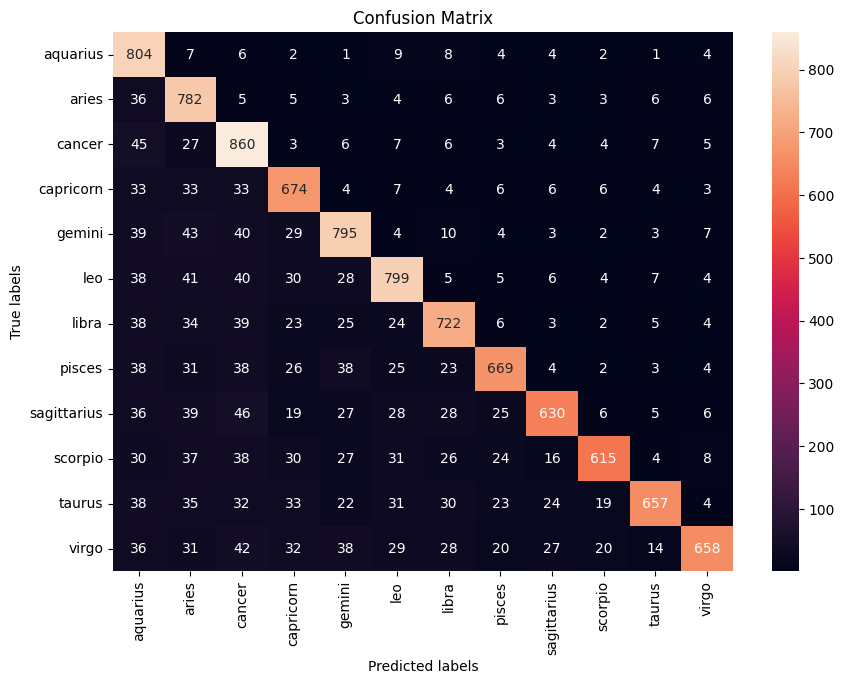

In [164]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
dt_cm = confusion_matrix(y_train, dt.predict(X_train))
sns.heatmap(dt_cm, annot=True, ax = ax,fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

dt_labels = dt.classes_ 
ax.xaxis.set_ticklabels(dt_labels)
ax.yaxis.set_ticklabels(dt_labels)

plt.show()

In [169]:
s = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring='accuracy')
s.mean(), s.std()

(np.float64(0.08464087147260599), np.float64(0.0027049596043294964))